<a href="https://colab.research.google.com/github/CaillahR/Adult-Income-Dataset/blob/main/Project_2_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Caillah Reed

#Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
set_config(display='diagram')

#Loading Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/archive.zip")

Mounted at /content/drive


#Adult Income

##Objective

 What is the possibility in predicting the income level based on the individual’s personal information, in canada?
- Target : Income


##Data Dictionary

- age : Age of adult in dataset
- workclass : type of employement, (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.)
- fnlwgt : final weight. the number of people the census believes are true wages
- education : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- educational-num : same as education
- marital-status : marital status
- occupation : occupation
- relationship : relationship to their family
- race : race
- gender : gender
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: People's native country

- The source of this data set is from [Kaggle](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

#Cleaning

##Droping duplicates

In [ ]:
duplicaterows = df[df.duplicated(keep='last')]
duplicaterows

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
488,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1319,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
1668,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
1854,22,Private,137876,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,20,United-States,<=50K
1863,20,?,203353,Some-college,10,Never-married,?,Own-child,White,Female,0,0,40,United-States,<=50K
3900,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
4152,17,Private,153021,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
5078,29,?,41281,Bachelors,13,Married-spouse-absent,?,Not-in-family,White,Male,0,0,50,United-States,<=50K
5782,21,Private,301694,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,35,Mexico,<=50K
5907,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
df = df.drop_duplicates()

##Inspect Numerical Errors

In [ ]:
df.describe(include="number")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


- Filtering all rows with age under 18 because they are not considered adults in Canada

In [ ]:
age_filter = df["age"] > 18

df = df.loc[age_filter]
display(df.describe())
df.info()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,47335.000000,4.733500e+04,47335.000000,47335.000000,47335.000000,47335.000000
mean,39.300180,1.897360e+05,10.155213,1111.013563,89.180184,40.934594
std,13.402909,1.055463e+05,2.558475,7564.174322,407.078597,12.072850
min,19.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,29.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,38.000000,1.783190e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.374980e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47335 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47335 non-null  int64 
 1   workclass        47335 non-null  object
 2   fnlwgt           47335 non-null  int64 
 3   education        47335 non-null  object
 4   educational-num  47335 non-null  int64 
 5   marital-status   47335 non-null  object
 6   occupation       47335 non-null  object
 7   relationship     47335 non-null  object
 8   race             47335 non-null  object
 9   gender           47335 non-null  object
 10  capital-gain     47335 non-null  int64 
 11  capital-loss     47335 non-null  int64 
 12  hours-per-week   47335 non-null  int64 
 13  native-country   47335 non-null  object
 14  income           47335 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


## Inspect Categorical Values for Errors

- Dropping fnlwgt, relationship, educational-num these either don't contribute to predicting income or are too similar to another column.

In [ ]:
df = df.drop(columns = ["fnlwgt", "relationship", "educational-num"])

In [ ]:
cat_cols = make_column_selector(dtype_include='object')(df)
for col in cat_cols:
  display(df[col].value_counts())

Private             32769
Self-emp-not-inc     3832
Local-gov            3100
?                    2544
State-gov            1965
Self-emp-inc         1675
Federal-gov          1425
Without-pay            21
Never-worked            4
Name: workclass, dtype: int64

HS-grad         15507
Some-college    10669
Bachelors        8013
Masters          2655
Assoc-voc        2060
Assoc-acdm       1601
11th             1287
10th             1138
7th-8th           943
Prof-school       834
9th               710
Doctorate         594
5th-6th           499
12th              499
1st-4th           245
Preschool          81
Name: education, dtype: int64

Married-civ-spouse       22352
Never-married            14648
Divorced                  6629
Separated                 1529
Widowed                   1516
Married-spouse-absent      624
Married-AF-spouse           37
Name: marital-status, dtype: int64

Prof-specialty       6135
Exec-managerial      6066
Craft-repair         6057
Adm-clerical         5484
Sales                5193
Other-service        4503
Machine-op-inspct    2987
?                    2548
Transport-moving     2337
Handlers-cleaners    1933
Farming-fishing      1444
Tech-support         1440
Protective-serv       970
Priv-house-serv       223
Armed-Forces           15
Name: occupation, dtype: int64

White                 40431
Black                  4566
Asian-Pac-Islander     1497
Amer-Indian-Eskimo      456
Other                   385
Name: race, dtype: int64

Male      31880
Female    15455
Name: gender, dtype: int64

United-States                 42414
Mexico                          924
?                               842
Philippines                     290
Germany                         204
Puerto-Rico                     180
Canada                          178
El-Salvador                     151
India                           149
Cuba                            137
China                           122
England                         122
South                           115
Jamaica                         105
Italy                           104
Dominican-Republic              102
Japan                            92
Vietnam                          86
Poland                           85
Guatemala                        85
Columbia                         83
Haiti                            73
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Ecuador                     

<=50K    35654
>50K     11681
Name: income, dtype: int64

- Dropping rows with "Without-pay", "Never-worked" in workclass, this data does not help us predict income


In [ ]:
workclass_filter = df["workclass"]=="Never-worked"
workclass_wo_filter = df["workclass"]=="Without-pay"
HPW_filter = df["hours-per-week"] <= 48

In [ ]:
df = df[~workclass_filter]
df = df [~workclass_wo_filter]
df = df[HPW_filter]
df["workclass"] = df["workclass"].replace("?","Unknown")
print(df["workclass"].value_counts())
print(df["hours-per-week"].value_counts())

Private             26721
Local-gov            2554
Unknown              2335
Self-emp-not-inc     2302
State-gov            1683
Federal-gov          1224
Self-emp-inc          804
Name: workclass, dtype: int64
40    22528
45     2704
35     1884
30     1563
20     1551
25      852
48      762
38      711
15      479
32      412
10      355
42      337
36      329
24      322
44      310
37      240
16      235
43      227
8       187
12      177
28      132
46      129
18      104
47       82
5        80
6        75
4        73
39       63
41       59
33       58
3        54
22       53
2        52
34       48
14       45
21       42
27       38
7        37
17       34
26       34
23       32
1        27
13       25
9        21
11       18
19       16
29       15
31       12
Name: hours-per-week, dtype: int64


<ipython-input-10-b0de1771a603>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df [~workclass_wo_filter]
<ipython-input-10-b0de1771a603>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[HPW_filter]


- Combining data into categories that are easier to follow.

In [ ]:
 df["workclass"] = df["workclass"].replace({"Self-emp-not-inc": "Self-Emp", 
                               "Self-emp-inc": "Self-Emp",
                               "Local-gov":"Gov",
                               "State-gov":"Gov",
                               "Federal-gov":"Gov"})

In [ ]:
 df["marital-status"] = df["marital-status"].replace({"Married-civ-spouse": "Married", 
                               "Married-spouse-absent":"Married",
                               "Married-AF-spouse":"Married",
                               "Never-married":"Single",
                               "Divorced":"Single",
                               "Separated":"Single",
                               "Widowed":"Single"})

In [ ]:
 df["education"] = df["education"].replace({"12th": "HS-Grad",
                               "11th":"Non-HS-Grad",
                               "10th":"Non-HS-Grad",
                               "9th":"Non-HS-Grad",
                               "7th-8th":"Non-HS-Grad",
                               "5th-6th":"Non-HS-Grad",
                               "1st-4th":"Non-HS-Grad",
                               "Preschool":"Non-HS-Grad",
                               "Assoc-voc":"Assoc",
                               "Assoc-acdm":"Assoc"})

In [ ]:
df["occupation"] = df["occupation"].replace({"?": "Unknown" })

In [ ]:
 df["native-country"] = df["native-country"].replace({"South": "Unknown", 
                               "?":"Unknown"})

In [ ]:
#Checking our overall data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37623 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             37623 non-null  int64 
 1   workclass       37623 non-null  object
 2   education       37623 non-null  object
 3   marital-status  37623 non-null  object
 4   occupation      37623 non-null  object
 5   race            37623 non-null  object
 6   gender          37623 non-null  object
 7   capital-gain    37623 non-null  int64 
 8   capital-loss    37623 non-null  int64 
 9   hours-per-week  37623 non-null  int64 
 10  native-country  37623 non-null  object
 11  income          37623 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.7+ MB


,age,workclass,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,Non-HS-Grad,Single,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
2,28,Gov,Assoc,Married,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,Non-HS-Grad,Single,Other-service,White,Male,0,0,30,United-States,<=50K
6,29,Unknown,HS-grad,Single,Unknown,Black,Male,0,0,40,United-States,<=50K


## Missing Values

In [ ]:
## Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [ ]:
#the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

age               0.0
workclass         0.0
education         0.0
marital-status    0.0
occupation        0.0
race              0.0
gender            0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64


#Exploratory

##Univariate Visuals

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37623 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             37623 non-null  int64 
 1   workclass       37623 non-null  object
 2   education       37623 non-null  object
 3   marital-status  37623 non-null  object
 4   occupation      37623 non-null  object
 5   race            37623 non-null  object
 6   gender          37623 non-null  object
 7   capital-gain    37623 non-null  int64 
 8   capital-loss    37623 non-null  int64 
 9   hours-per-week  37623 non-null  int64 
 10  native-country  37623 non-null  object
 11  income          37623 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.7+ MB


Text(0.5, 0, '')

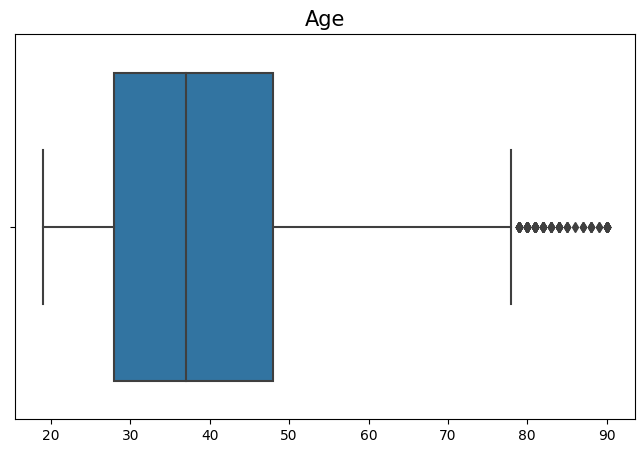

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.boxplot( x="age", data=df)
ax.set_title("Age", fontsize = 15);
ax.set_xlabel('')

- Outliers are ages from 77 years and up

Text(0.5, 1.0, 'Work Class')

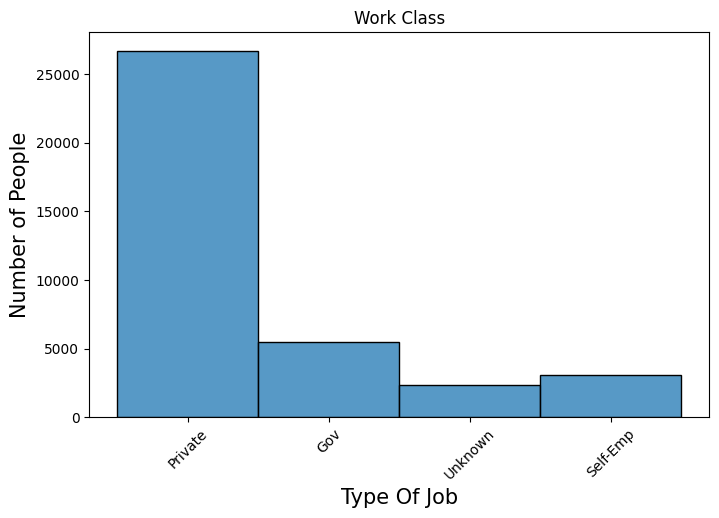

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "workclass", data=df)
plt.xticks(rotation=45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Type Of Job', fontsize = 15)
ax.set_title("Work Class")

- Outlier : Private

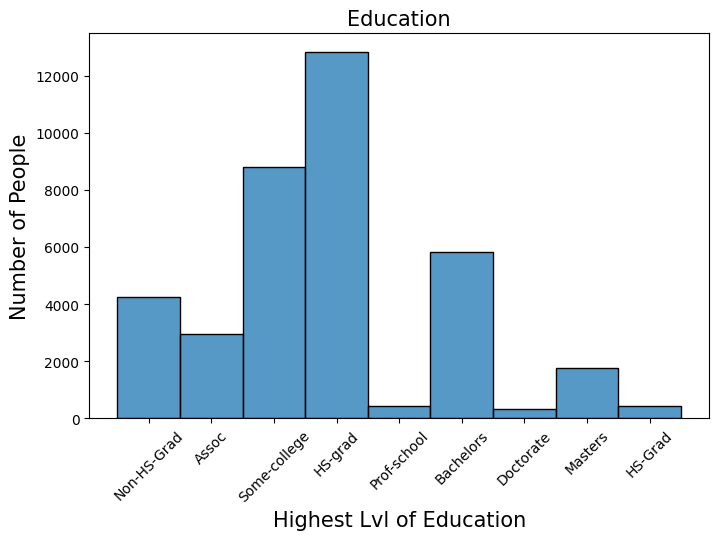

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "education", data=df)
plt.xticks(rotation=45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Highest Lvl of Education', fontsize = 15)
ax.set_title("Education", fontsize = 15);

- Outliers here seems to be HS gradutates, Prof-school, Doctorate, and HS-Grad.

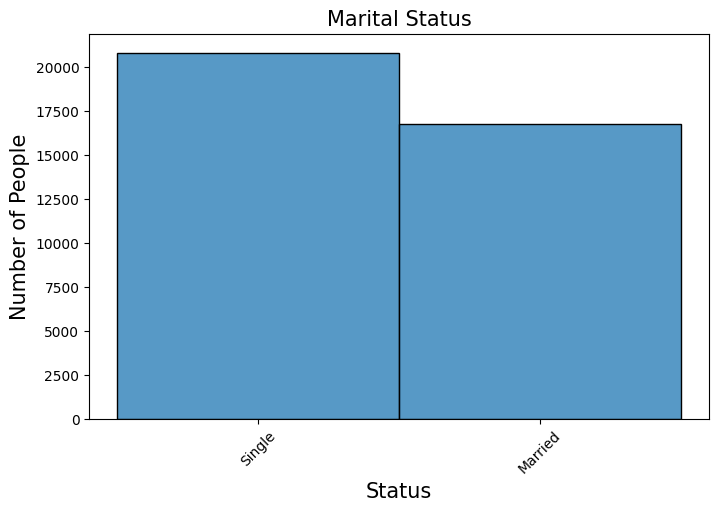

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "marital-status", data=df )
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Status', fontsize = 15)
ax.set_title("Marital Status", fontsize = 15);

- Outlier: none

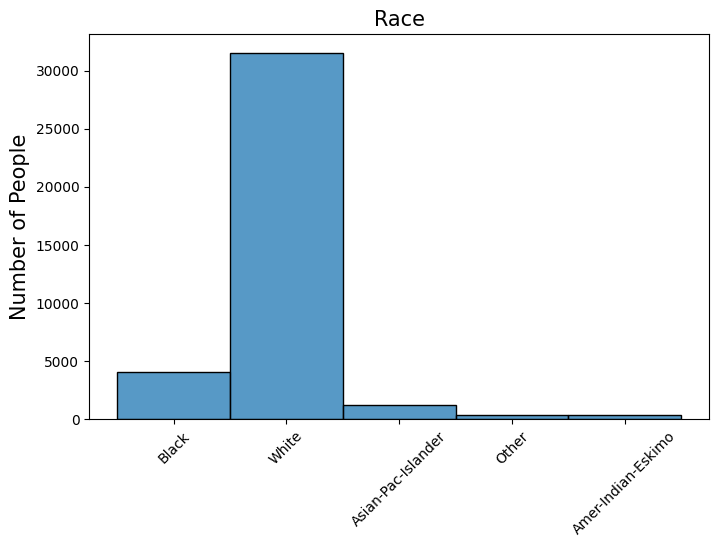

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "race", data=df )
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('')
ax.set_title("Race", fontsize = 15);

- Outlier : White People

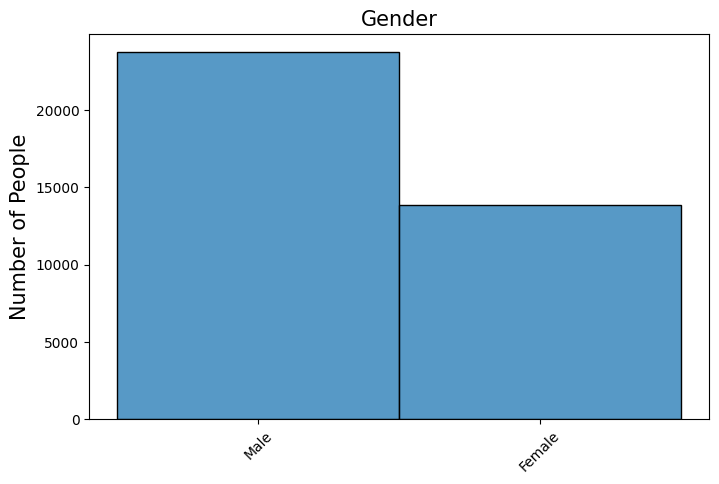

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "gender", data=df )
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('')
ax.set_title("Gender", fontsize = 15);

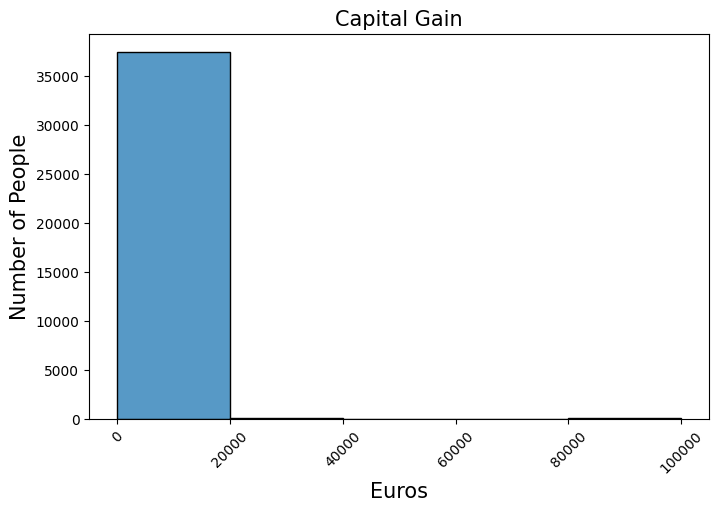

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "capital-gain", data=df, bins = 5)
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Euros', fontsize = 15)
ax.set_title("Capital Gain", fontsize = 15);

- Outlier: number of people who have contributed toward 0-20000 of capital gain

Text(0.5, 0, 'Euros')

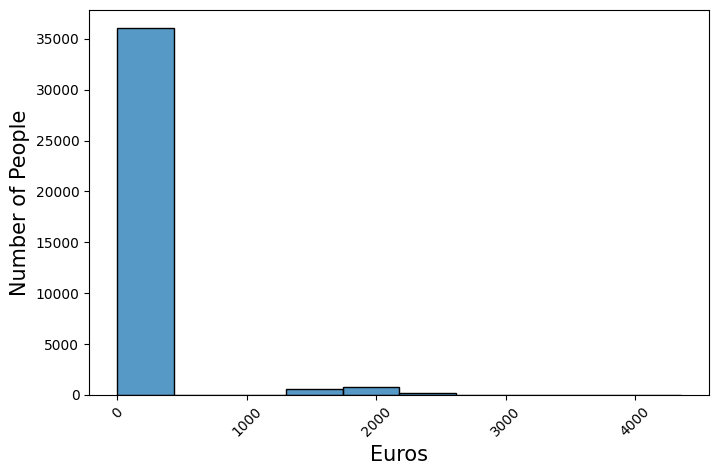

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "capital-loss", data=df, bins = 10)
plt.xticks(rotation = 45)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Euros', fontsize = 15)

- Outlier: number of people who have contributed toward 0-500 of capital loss

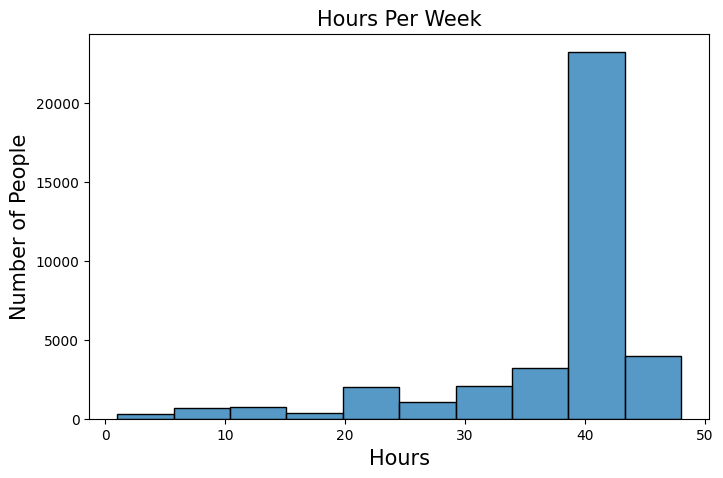

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "hours-per-week", data=df, bins = 10 )
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Hours', fontsize = 15)
ax.set_title("Hours Per Week", fontsize = 15);

- Outlier: 30-40 hours

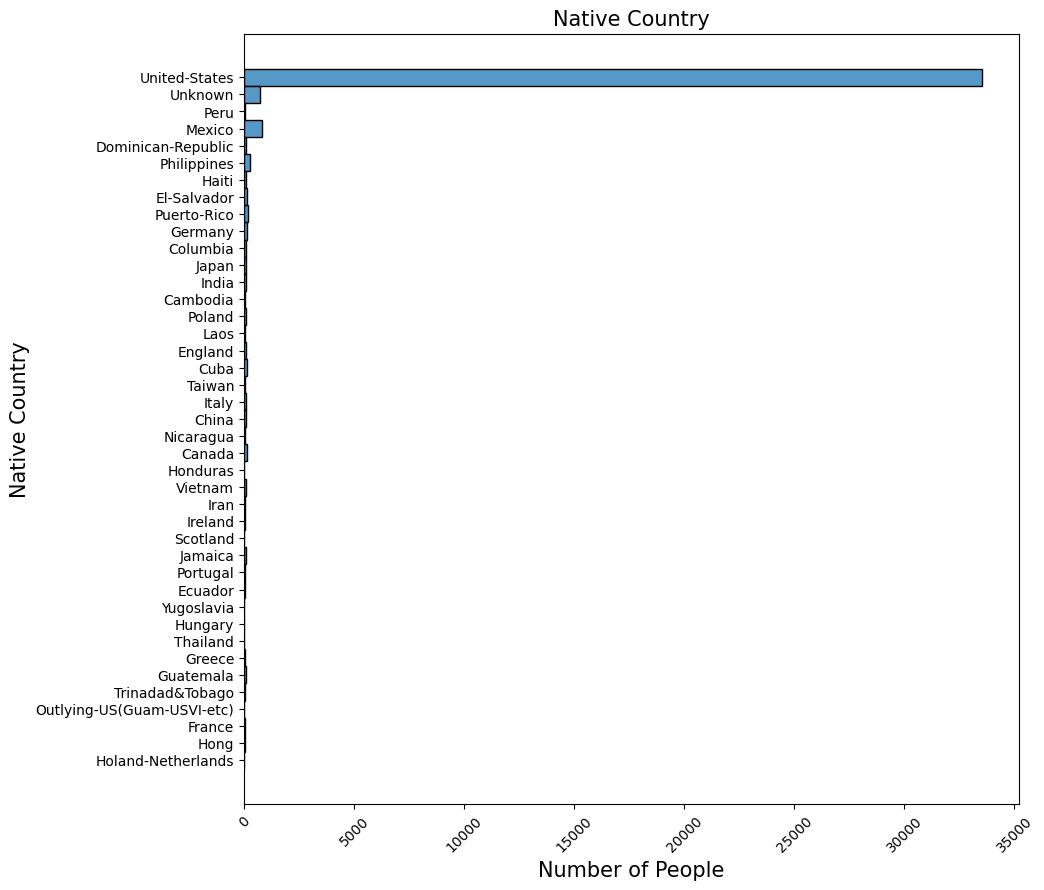

In [ ]:
fig = plt.figure(figsize =(10, 10))
ax = sns.histplot( y = "native-country", data=df )
plt.xticks(rotation = 45)
ax.set_ylabel('Native Country',fontsize = 15)
ax.set_xlabel('Number of People', fontsize = 15)
ax.set_title("Native Country", fontsize = 15);

- Outlier: United States

Text(0.5, 1.0, 'Income')

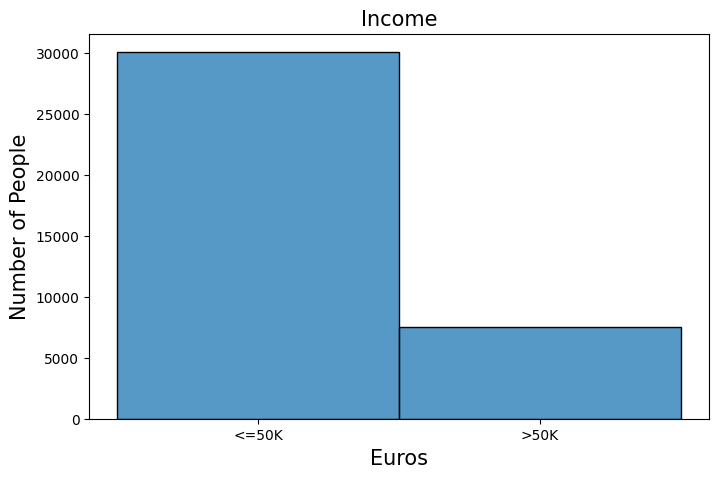

In [ ]:
fig = plt.figure(figsize =(8, 5))
ax = sns.histplot( x = "income", data=df)
ax.set_ylabel('Number of People',fontsize = 15)
ax.set_xlabel('Euros',fontsize = 15)
ax.set_title("Income",fontsize = 15)

- Outlier: Over 10000 people making less than 50k

## Correlation

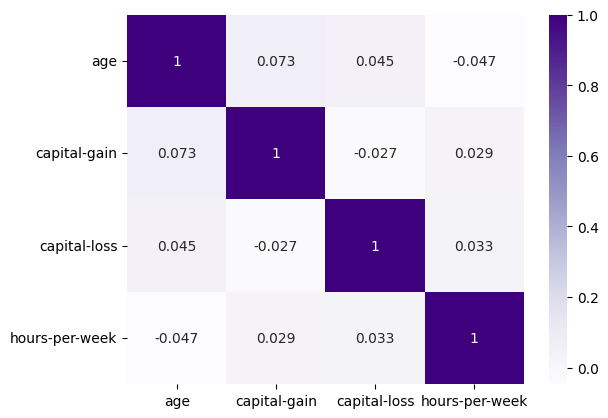

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True)
plt.show()

In [ ]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,37623.000000,37623.000000,37623.000000,37623.000000
mean,38.997927,752.124046,78.865162,36.734099
std,13.900005,5667.792158,382.081877,8.473595
min,19.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,36.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,40.000000
max,90.000000,99999.000000,4356.000000,48.000000


##Multi-Variate Visuals

###Capital Gain

####Best Graphs Chosen (1)

<ipython-input-41-5ad35ae1ec98>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


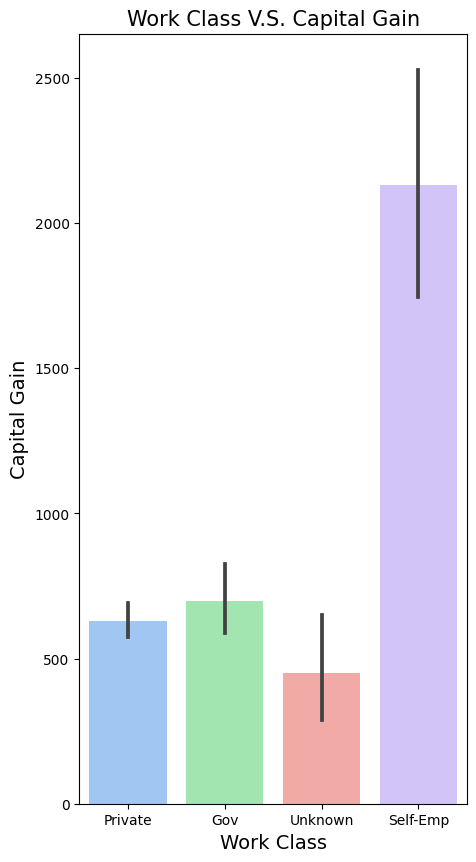

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=df, x="workclass", y= "capital-gain")
plt.title("Work Class V.S. Capital Gain", fontsize = 15)
plt.xlabel("Work Class", fontsize = 14)
plt.ylabel("Capital Gain", fontsize = 14)
plt.show()

- People who are self-employed have way more capital gain than any other working class.

<ipython-input-42-39004ca80165>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


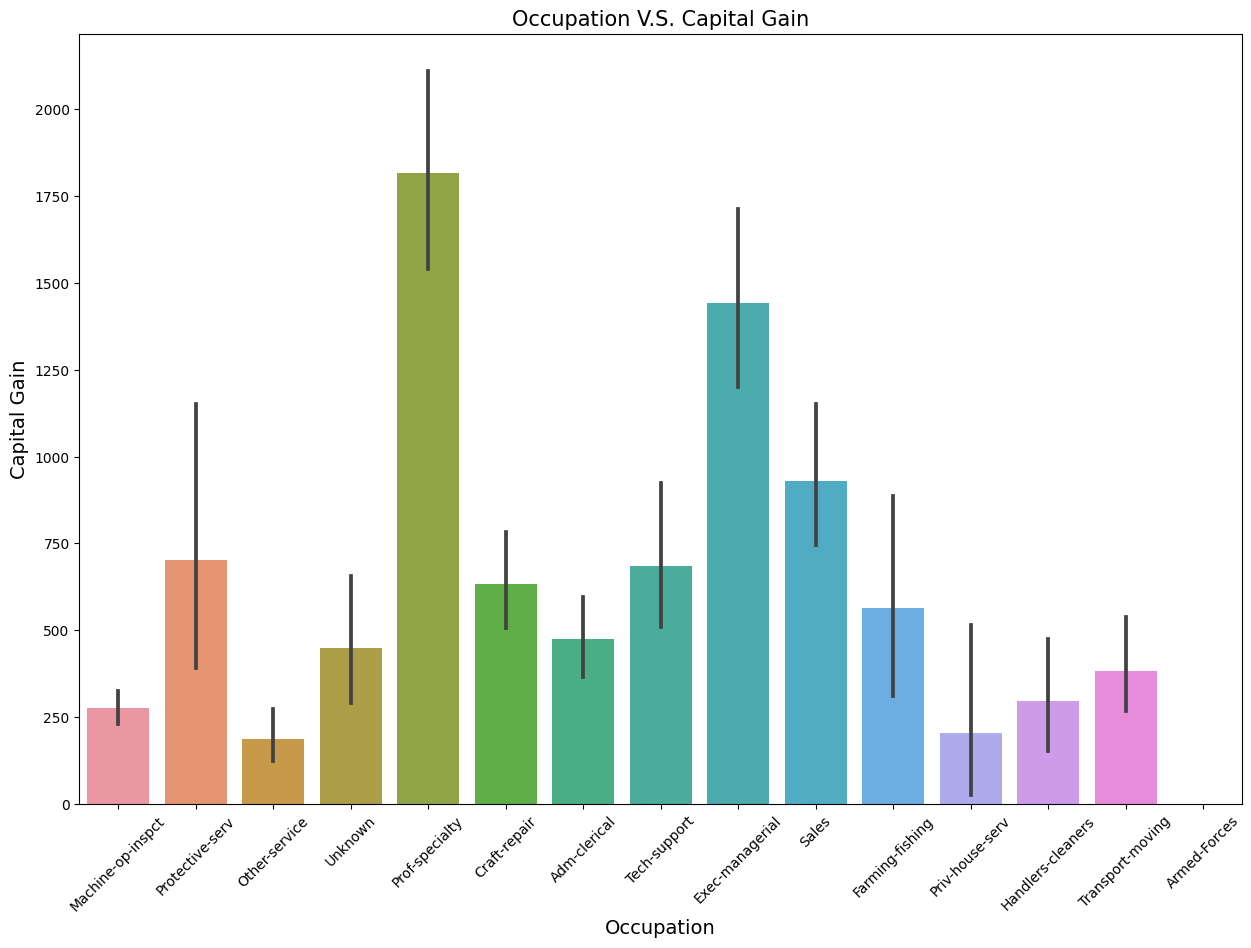

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=df, x="occupation", y= "capital-gain")
plt.title("Occupation V.S. Capital Gain", fontsize = 15)
plt.xlabel("Occupation", fontsize = 14)
plt.xticks(rotation = 45)
plt.ylabel("Capital Gain", fontsize = 14)
plt.show()

- People that work in a professionl specialty role have the highest capital gain and the lowest capital gain are, private house service and any service other than the ones listed.

####Other Statistics

<ipython-input-38-3a3f85a9a020>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


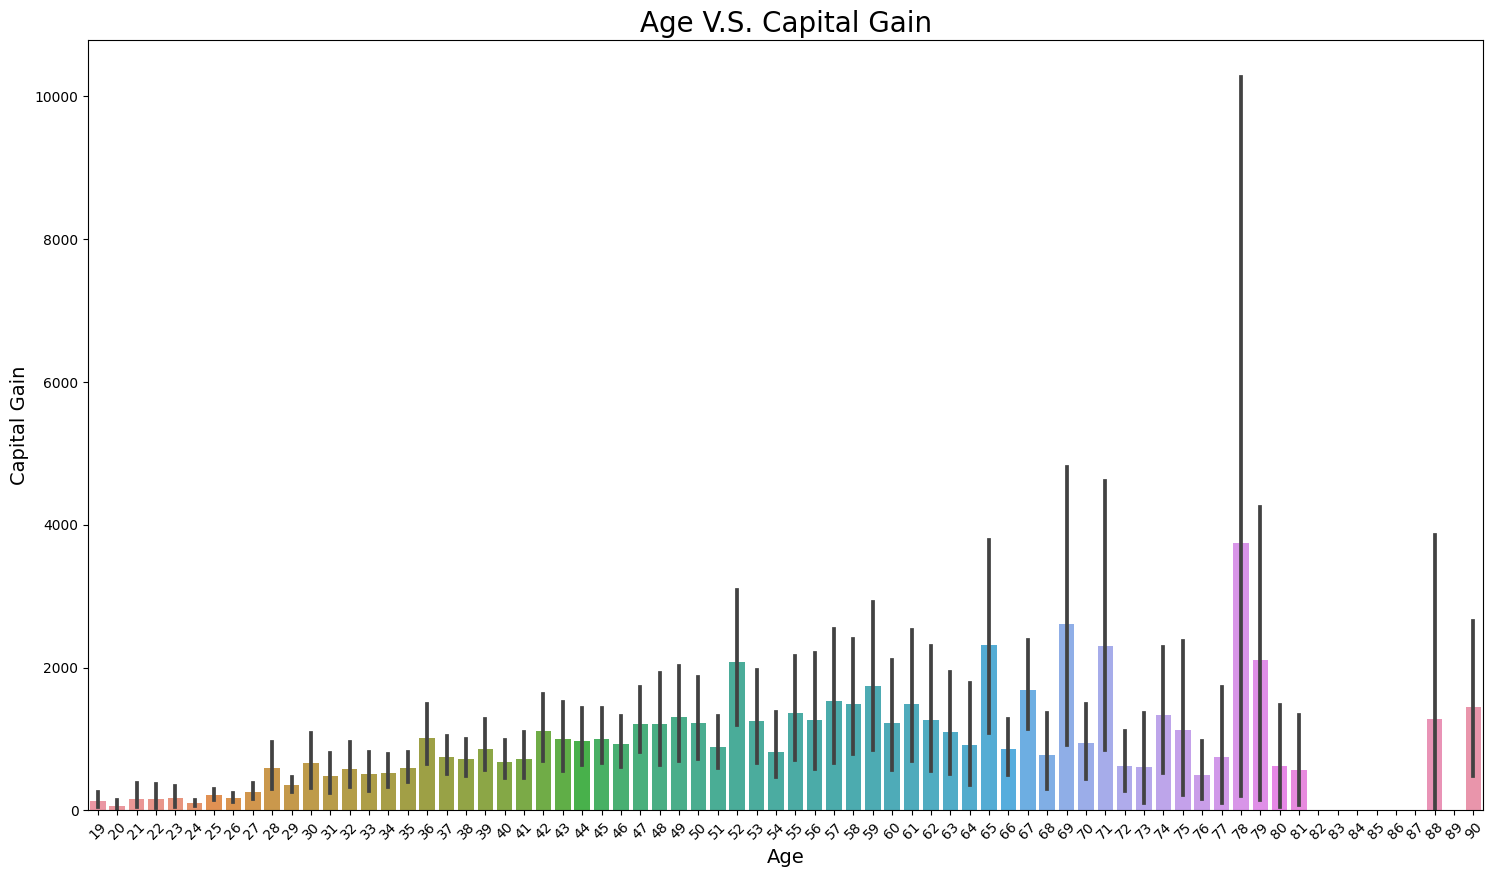

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize =(18,10))
sns.barplot(data = df, x = "age", y = "capital-gain")
plt.title("Age V.S. Capital Gain", fontsize = 20)
plt.xlabel("Age", fontsize = 14)
plt.xticks(rotation = 45)
plt.ylabel("Capital Gain", fontsize = 14)
plt.show()

- adults 78 years old have the highest capital gain of all ages and ages 19-27,82-87, & 89 year olds have very little to no capital gain.

<ipython-input-34-777e285c74a9>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


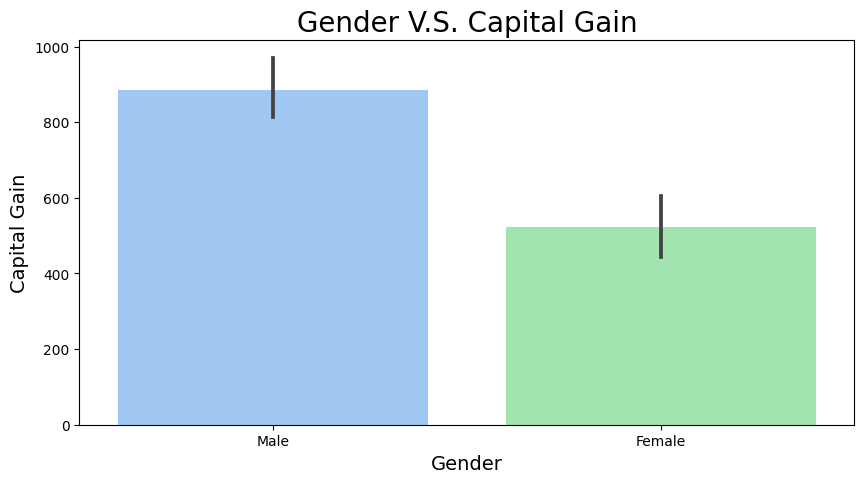

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x= "gender", y = "capital-gain")
plt.title("Gender V.S. Capital Gain", fontsize = 20)
plt.xlabel("Gender", fontsize = 14)
plt.ylabel("Capital Gain", fontsize = 14)
plt.show()

- This data set shows that men have more capital gain than women.

<ipython-input-35-adb8e8dda06d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


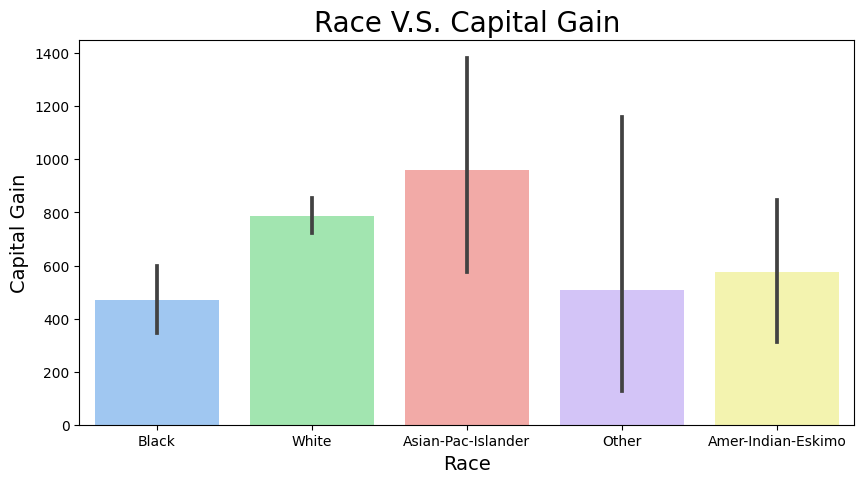

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x ="race", y= "capital-gain")
plt.title("Race V.S. Capital Gain", fontsize = 20)
plt.xlabel("Race", fontsize = 14)
plt.ylabel("Capital Gain", fontsize = 14)
plt.show()

- Asian-Pac-Islander people seem to have more capital gain than other races and black people have the lowest capital gain than any other race

<ipython-input-40-c14d268d589d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


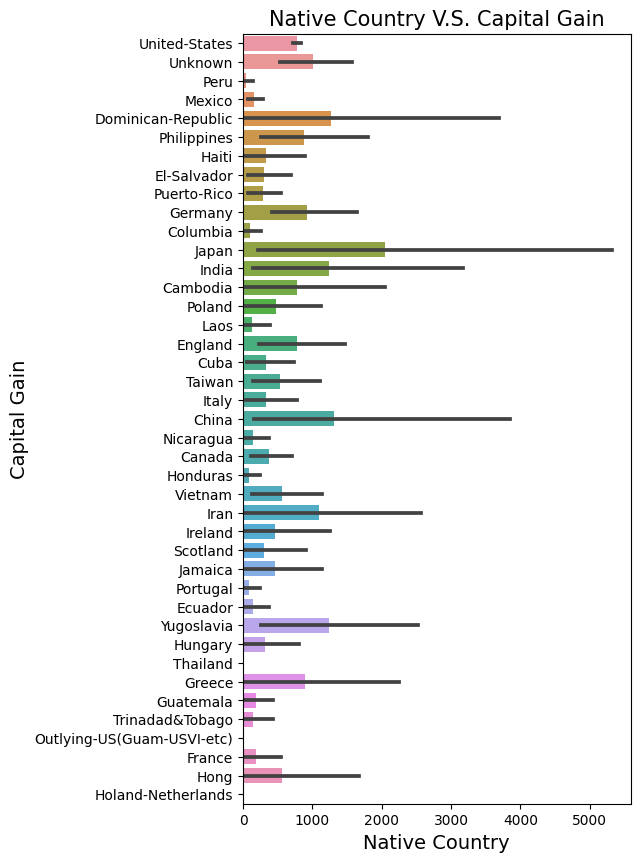

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=df, y ="native-country", x= "capital-gain")
plt.title("Native Country V.S. Capital Gain", fontsize = 15)
plt.xlabel("Native Country", fontsize = 14)
plt.ylabel("Capital Gain", fontsize = 14)
plt.show()

- This graph shows people who are japanese tend to have more capital gain than other native countries.

###Capital Loss

####Best Graphs Chosen (2)

<ipython-input-47-23514acc264c>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


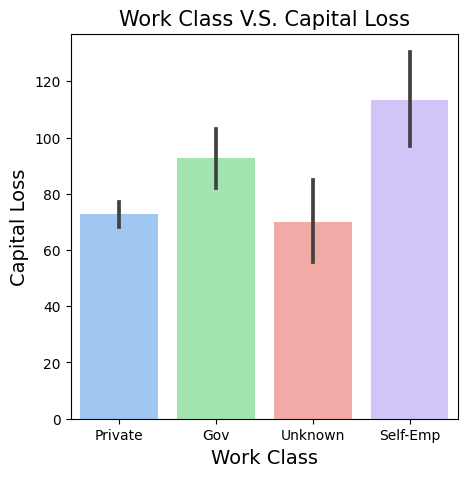

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=df, x="workclass", y= "capital-loss")
plt.title("Work Class V.S. Capital Loss", fontsize = 15)
plt.xlabel("Work Class", fontsize = 14)
plt.ylabel("Capital Loss", fontsize = 14)
plt.show()

- Highest capital loss are Self-Employed people and the lowest are people with unknown titles.

<ipython-input-48-855c40637863>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


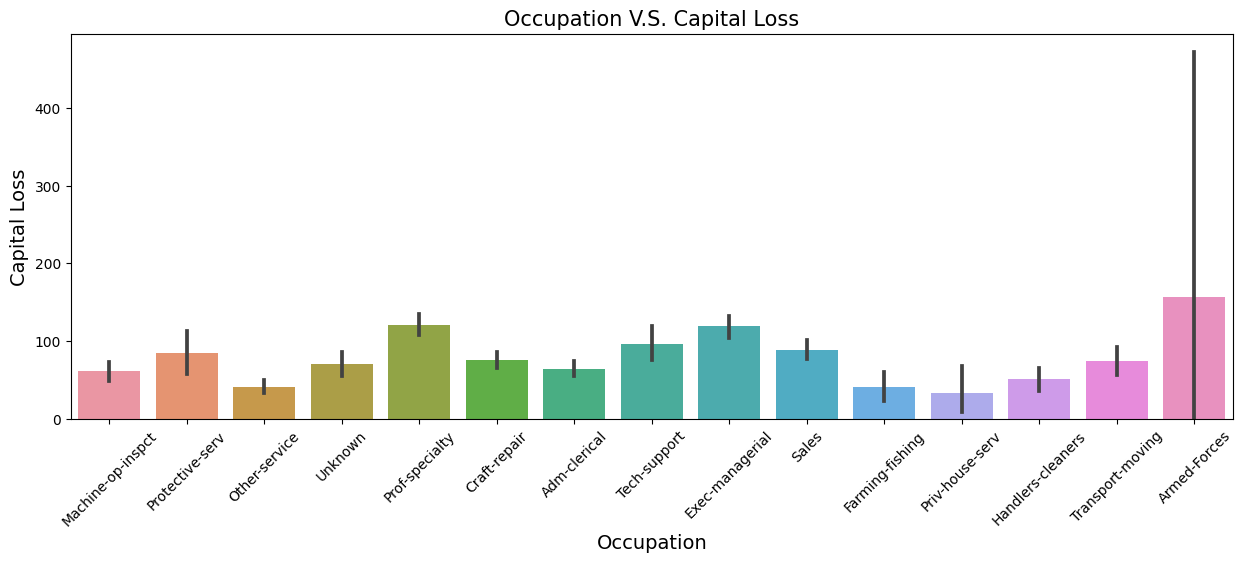

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=df, x="occupation", y= "capital-loss")
plt.title("Occupation V.S. Capital Loss", fontsize = 15)
plt.xlabel("Occupation", fontsize = 14)
plt.xticks(rotation = 45)
plt.ylabel("Capital Loss", fontsize = 14)
plt.show()

- People in the armed forces have the highest capital loss and people in other-services and private house cleaners have the lowest capital loss.

####Other Statistics

<ipython-input-43-82de42797d33>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


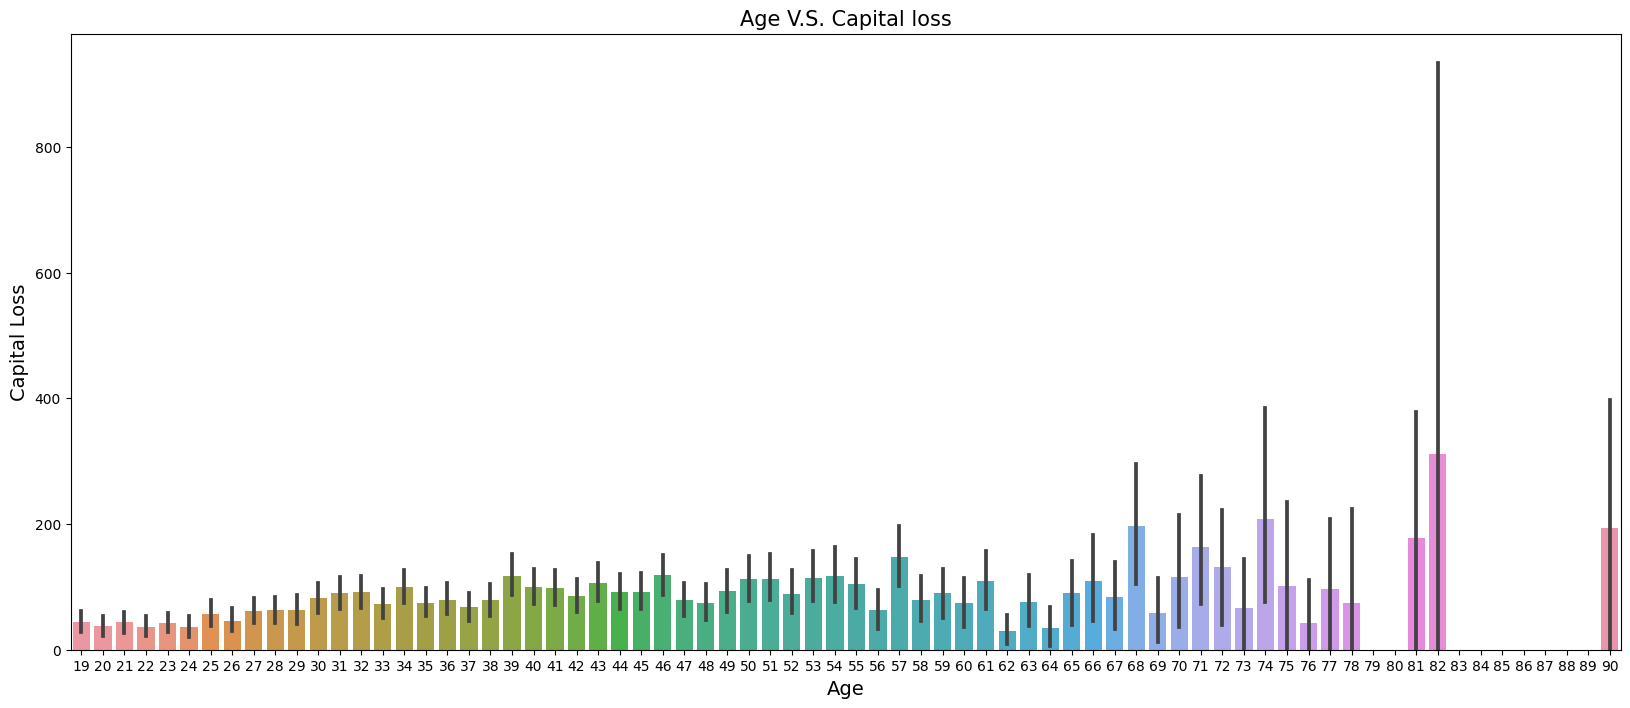

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize =(20,8))
sns.barplot(data = df, x = "age", y = "capital-loss")
plt.title("Age V.S. Capital loss", fontsize = 15)
plt.xlabel("Age", fontsize = 14)
plt.ylabel("Capital Loss", fontsize = 14)
plt.show()

- People who are 82 years old seem to have high capital loss and people who are 20, 22, 24 62, & 64 have low capital loss

- 

<ipython-input-45-3126c8573a9d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


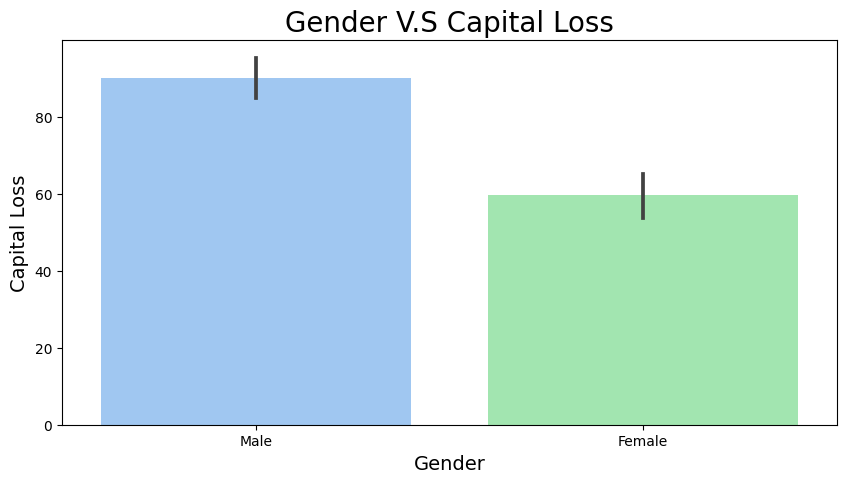

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data = df, x = "gender", y = "capital-loss")
plt.title("Gender V.S Capital Loss", fontsize =20)
plt.xlabel("Gender", fontsize = 14)
plt.ylabel("Capital Loss", fontsize = 14)
plt.show()

- Males seem to have a high capital loss and a high capital gain (see capital gain)

<ipython-input-44-2ca57d5e251d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


<Axes: xlabel='race', ylabel='capital-loss'>

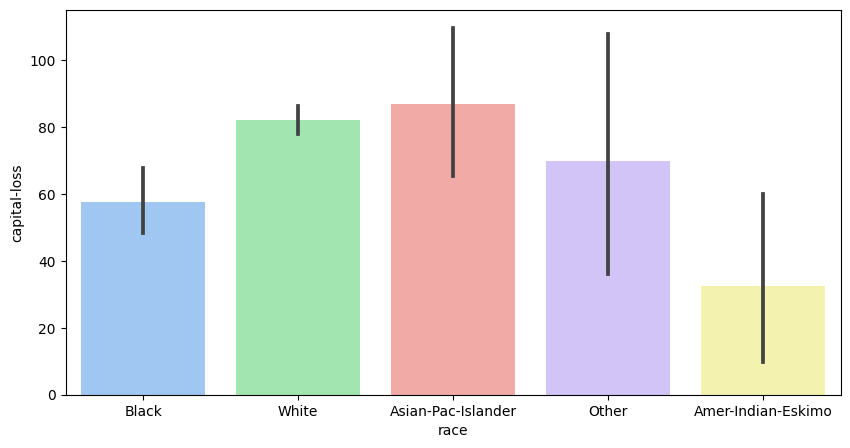

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x ="race", y= "capital-loss")

- Asian Pacific Islanders have a high capital loss and a high capital gain. American Indian Eskimos have the lowest capital loss.

<ipython-input-49-562b2d7b51e1>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-pastel")


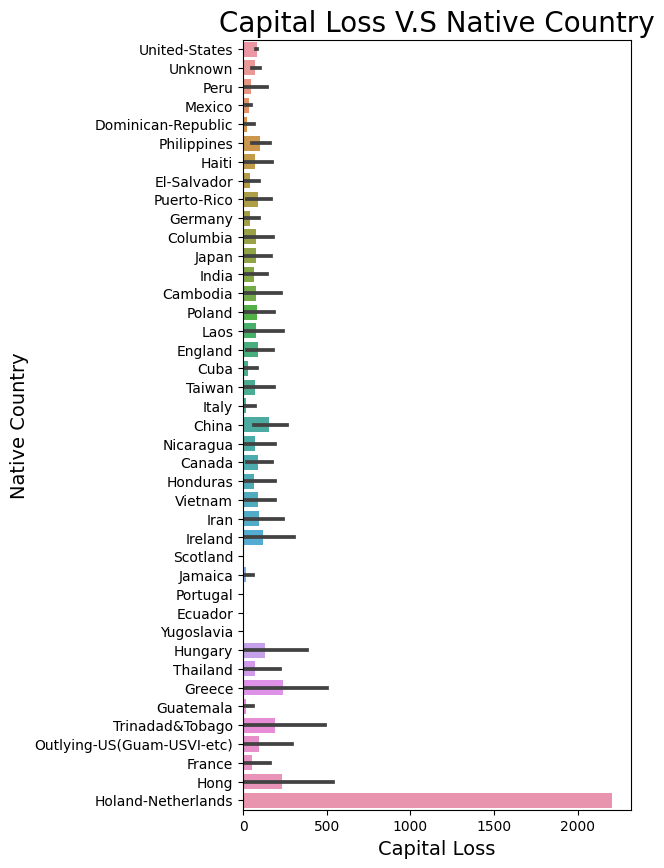

In [ ]:
plt.style.use("seaborn-pastel")
fig, ax = plt.subplots(figsize=(5,10))
sns.barplot(data=df, y ="native-country", x= "capital-loss")
plt.title("Capital Loss V.S Native Country", fontsize =20)
plt.xlabel("Capital Loss", fontsize = 14)
plt.ylabel("Native Country", fontsize = 14)
plt.show()

- People from the Holand-Netherlands has a significantly high capital loss as compared to other native countries and the lowest CL are from Scotland, Portugal, Ecuador, Yugoslavia, Dominican Republica, Guatemala, Italy, Cuba, and Jamaica.